In [25]:
#读取文件，分词+去停用词
import jieba
import pandas as pd
comments=pd.read_csv('d:/aa/弹幕-红海行动data.csv')
# comments
com_cut=comments["comment"].apply(jieba.lcut)  # apply是对每行操作
print(com_cut)      #com_cut为 pandas系列
# com_cut为分词后的结果，每行都是一个分词列表

0                                    [瞬间, 火气, 上来, 了]
1              [坐车, 不系, 安全带, 的, 下场, 大家, 都, 看到, 了, 吧]
2                                   [车长, 技能, ：, 多面手]
3                              [好家伙, ，, 直接, 捅马蜂窝, 。]
4                       [电影院, 看, 的, 时候, 这里, 看, 哭, 了]
                            ...                     
9595    [核, 原料, 黑市, 啥, 的, 五常, 应该, 是, 能, 介入, 吧, 2333]
9596    [抗美援朝, 就是, 靠, 斜坡, 躲, 炮弹, 的,  , 没, 这么, 容易, 死]
9597                                         [真, 男人]
9598                [这, 记者, 都, 能, 去, 情报部门, 工作, 了, 吧]
9599               [要, 抓活, 的, ，, 不然, 随便, 搞, 死, 他, 了]
Name: comment, Length: 9600, dtype: object


In [26]:
#去停用词
with open('d:/aa/stop.txt',encoding='utf-8') as f:
    stop_words=f.read()            #stop_words为字符串 str
# print(type(stop_words))

stop_words+='\n'  #添加一个停用词
#  在x中，不在stop_words中则保留
keep = lambda x:[i for i in x if i not in stop_words ]  #自定义lambda函数
com_clear=com_cut.apply(keep)   #因为com_cut是pandas中的一列，不能这样用com_clear=keep(com_cut)，一定要用 apply这种方式
        
print(com_clear)  #com_clear为去除停用词之后的结果

# print(com_clear.isnull().sum())  # 检查有没有空行

0                        [瞬间, 火气]
1               [坐车, 不系, 安全带, 下场]
2                   [车长, 技能, 多面手]
3                     [好家伙, 捅马蜂窝]
4                        [电影院, 哭]
                  ...            
9595    [核, 原料, 黑市, 五常, 介入, 2333]
9596            [抗美援朝, 斜坡, 躲, 炮弹]
9597                         [男人]
9598               [记者, 情报部门, 工作]
9599                  [抓活, 随便, 搞]
Name: comment, Length: 9600, dtype: object


In [27]:
lista = [j for i in com_clear for j in i]
word_yun1 = pd.value_counts(lista)
word_yun1

真的    190
致敬    183
中国    119
这是    115
无敌    111
     ... 
露个      1
商务      1
歌唱      1
孤岛      1
啥子      1
Length: 9337, dtype: int64

(-0.5, 499.5, 363.5, -0.5)

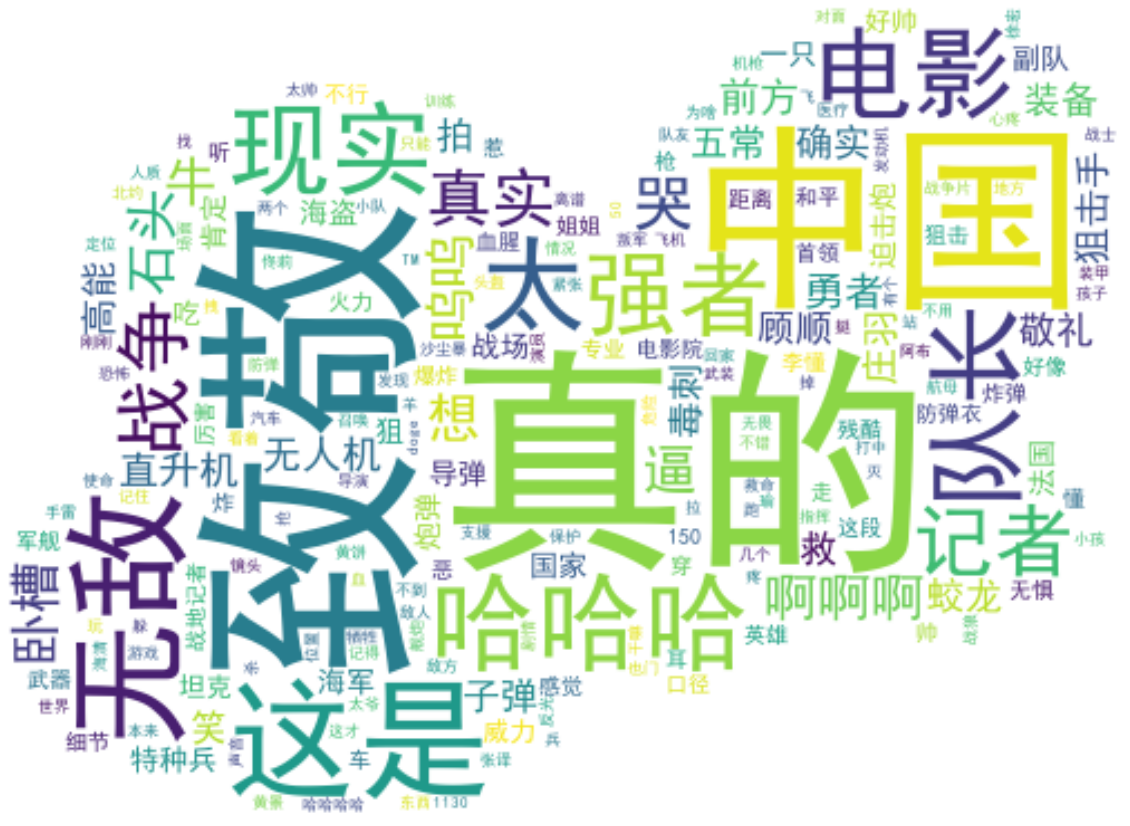

In [28]:
#绘制词云图
import matplotlib.pyplot as plt
from wordcloud import WordCloud
pic=plt.imread("d:/aa/心.jpg")

#字体：simfang.ttf   simhei.TTF
word_cloud=WordCloud(mask=pic,background_color='white', width=1024, height=768, font_path=u"c:/windows/fonts/simhei.TTF")

word_cloud.fit_words(word_yun1)

plt.figure(figsize=(20,20))  #单位为英寸

plt.imshow(word_cloud,interpolation='bilinear') #双线性插值法显示

plt.axis("off")  #不显示坐标轴

In [31]:
comments['出现时间'] = pd.to_datetime(comments['发送时间'],unit='s') 
comments['出现时间s'] = comments['出现时间'].dt.dayofweek
lista = comments['出现时间s'].value_counts() # 
lista = lista.sort_index()  #按index索引排序
lista

0    1185
1    1423
2    1405
3    1358
4    1242
5    1530
6    1457
Name: 出现时间s, dtype: int64

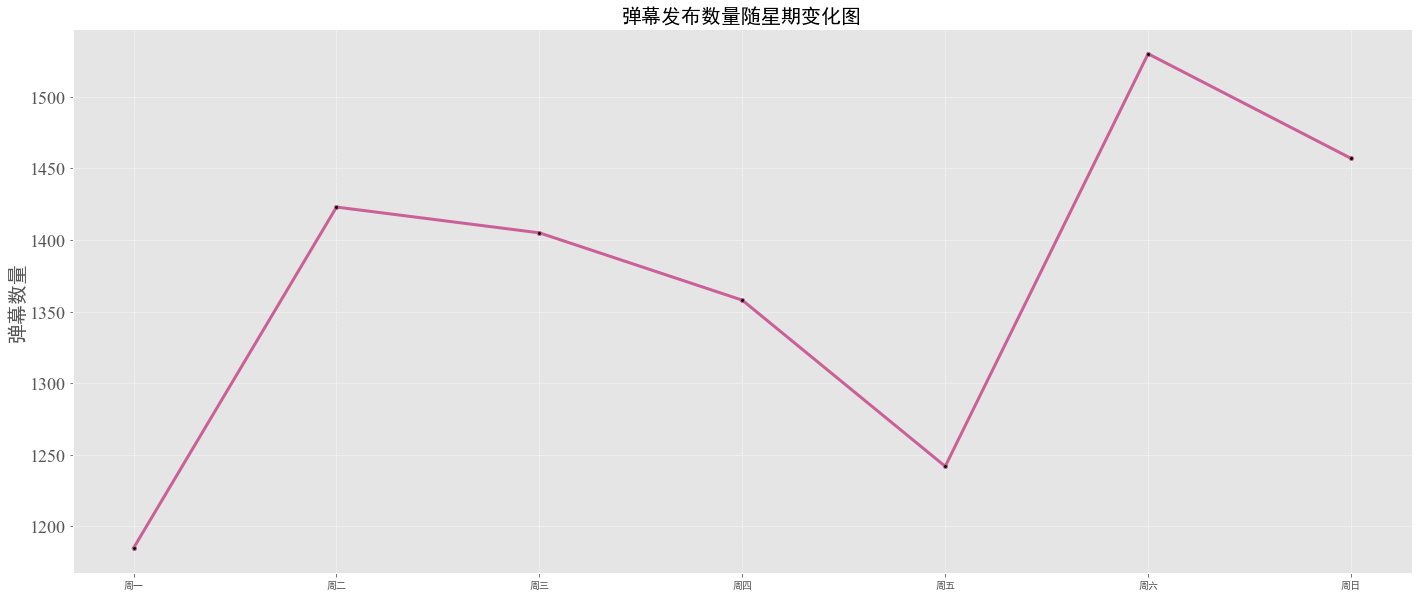

In [33]:
import matplotlib.pyplot as plt

# 以下2句显示中文时才需要
plt.rcParams['font.sans-serif'] = 'SimHei'    #默认字体，黑体 
plt.rcParams['axes.unicode_minus'] = False    #正负号正常显示
# 指定画布
plt.figure(figsize=(24, 10))              #默认单位为英寸
plt.style.use("ggplot")  #风格


week=["周一","周二","周三","周四","周五","周六","周日"]
plt.grid(True, linewidth = "0.5", linestyle = "--")

plt.plot(week, lista.values,  #折线图
         linewidth="3",
         marker="o",
         markersize="4",
         markerfacecolor="black",
         color="#CB5F97")  

plt.yticks(fontproperties = 'Times New Roman', size = 18)
plt.ylabel('弹幕数量',size =20)
plt.title('弹幕发布数量随星期变化图',size =20)
plt.show()




In [32]:
comments

,出现时间点,模式,字体,颜色,发送时间,弹幕池,用户ID,rowID,aa,comment,出现时间,出现时间s
0,3315.593,1,25,16777215,1645973320,0,aa448c39,997255508194009088,11,瞬间火气上来了,2022-02-27 14:48:40,6
1,2599.852,1,25,16777215,1645872903,0,2bfb812a,996413149743104000,11,坐车不系安全带的下场大家都看到了吧,2022-02-26 10:55:03,5
2,6890.908,1,25,16777215,1645871729,0,c21ce205,996403296763838464,11,车长技能：多面手,2022-02-26 10:35:29,5
3,3154.747,1,25,16777215,1645868120,0,88a00e84,996373027626196992,11,好家伙，直接捅马蜂窝。,2022-02-26 09:35:20,5
4,6673.941,1,25,16777215,1645867377,0,87318324,996366791113629696,11,电影院看的时候这里看哭了,2022-02-26 09:22:57,5
...,...,...,...,...,...,...,...,...,...,...,...,...
9595,3061.181,1,25,16777215,1630941882,0,159205b0,54447666726832128,1,核原料黑市啥的五常应该是能介入吧2333,2021-09-06 15:24:42,0
9596,4019.665,1,25,16777215,1630939746,0,47f0fb6e,54446546756586496,1,抗美援朝就是靠斜坡躲炮弹的 没这么容易死,2021-09-06 14:49:06,0
9597,6514.761,1,25,16777215,1630939009,0,247949bb,54446160543954944,1,真男人,2021-09-06 14:36:49,0
9598,4560.340,1,25,16777215,1630938141,0,f9296a3c,54445705057106432,1,这记者都能去情报部门工作了吧,2021-09-06 14:22:21,0
